## PROBLEM STATEMENT:  In this project, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Data Cleaning

In [132]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [133]:
# loading the data 
tele = pd.read_csv("telecom_churn_data.csv")
# understand the data
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [134]:
# let's look at the columns and analyse them
pd.set_option('display.max_columns', None)
col = tele.columns.tolist()
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [135]:
tele.shape

(99999, 226)

In [136]:
tele1 = tele

## 1.Handling missing values

In [137]:
# percentage of missing values
round(100*(tele1.isnull().sum()/len(tele1.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [138]:
# Let's understand the statistics of the data
tele1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [139]:
# Replace the nan values for the columns with min value as 1 with 0.0
tele1['max_rech_data_6'] = tele1['max_rech_data_6'].replace(to_replace = np.nan, value = 0.0)
tele1['max_rech_data_7'] = tele1['max_rech_data_7'].replace(to_replace = np.nan, value = 0.0)
tele1['max_rech_data_8'] = tele1['max_rech_data_8'].replace(to_replace = np.nan, value = 0.0)
tele1['max_rech_data_9'] = tele1['max_rech_data_9'].replace(to_replace = np.nan, value = 0.0)

In [140]:
# As we need total_rech_data_ , the nan values implies no data used so let's replace the nan values by 0.0
tele1['total_rech_data_6'] = tele1['total_rech_data_6'].replace(to_replace = np.nan, value =0.0)
tele1['total_rech_data_7'] = tele1['total_rech_data_7'].replace(to_replace = np.nan, value =0.0)
tele1['total_rech_data_8'] = tele1['total_rech_data_8'].replace(to_replace = np.nan, value =0.0)
tele1['total_rech_data_9'] = tele1['total_rech_data_9'].replace(to_replace = np.nan, value =0.0)

tele1['av_rech_amt_data_6'] = tele1['av_rech_amt_data_6'].replace(to_replace = np.nan, value =0.0)
tele1['av_rech_amt_data_7'] = tele1['av_rech_amt_data_7'].replace(to_replace = np.nan, value =0.0)
tele1['av_rech_amt_data_8'] = tele1['av_rech_amt_data_8'].replace(to_replace = np.nan, value =0.0)
tele1['av_rech_amt_data_9'] = tele1['av_rech_amt_data_9'].replace(to_replace = np.nan, value =0.0)

# We replace the nan values in total_rech_amt and total rechdata as 0
tele1['total_rech_amt_6'] = tele1['total_rech_amt_6'].replace(to_replace = np.nan, value =0.0)
tele1['total_rech_amt_7'] = tele1['total_rech_amt_7'].replace(to_replace = np.nan, value =0.0)
tele1['total_rech_amt_8'] = tele1['total_rech_amt_8'].replace(to_replace = np.nan, value =0.0)
tele1['total_rech_amt_9'] = tele1['total_rech_amt_9'].replace(to_replace = np.nan, value =0.0)

In [141]:
# checking for missing  values
tele1.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [142]:
# % of missing values
round(100*(tele1.isnull().sum()/len(tele.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [143]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
tele1.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [144]:
# replacing all null values and spaces if present by nan
# dropping all the columns with missing  values > 70% 
tele1 = tele1.replace([' ','NULL'],np.nan)
tele1 = tele1.dropna(thresh = tele1.shape[0]*0.7,how = all, axis=1)

In [145]:
round(100*(tele1.isnull().sum()/len(tele1.index)),2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [146]:
# we replace the  nan values by median
tele1 = tele1.replace(to_replace= np.nan, value = tele.median())

In [147]:
tele1.isnull().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou             0
std_og_t2o_mou             0
loc_ic_t2o_mou             0
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
onnet_mou_9                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
offnet_mou_9               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_ic_mou_9              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
roam_og_mou_9              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2t_mou_9           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou

In [148]:
tele1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,

### Derive features

In [149]:
#Derive a new feature as we can replace the d/m/y into just date
# As we can see the  date of last recharge of months  6,7 ,8 , 9 of year 2014 we can just extract the last date of particular month as a seperate column 
tele1['last-rech-date-6'] = pd.DatetimeIndex(tele1['date_of_last_rech_6']).day
tele1['last-rech-date-7'] = pd.DatetimeIndex(tele1['date_of_last_rech_7']).day 
tele1['last-rech-date-8'] = pd.DatetimeIndex(tele1['date_of_last_rech_8']).day 
tele1['last-rech-date-9'] = pd.DatetimeIndex(tele1['date_of_last_rech_9']).day
tele1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last-rech-date-6,last-rech-date-7,last-rech-date-8,last-rech-date-9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,2

In [150]:
# drop the original columns after extracting the dates
tele1 = tele1.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                  'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis = 1)
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [151]:
# Replacing nan values when the customer has not recharged
tele1['last-rech-date-6'] = tele1['last-rech-date-6'].replace(to_replace = np.nan ,value = 0.0)
tele1['last-rech-date-7'] = tele1['last-rech-date-7'].replace(to_replace= np.nan, value=0.0)
tele1['last-rech-date-8'] = tele1['last-rech-date-8'].replace(to_replace= np.nan,value= 0.0)
tele1['last-rech-date-9'] = tele1['last-rech-date-9'].replace(to_replace = np.nan, value =0.0)

In [152]:
tele1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last-rech-date-6,last-rech-date-7,last-rech-date-8,last-rech-date-9
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,21.0,16.0,8.0,28.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.

In [153]:
tele1.isnull().any()

mobile_number         False
circle_id             False
loc_og_t2o_mou        False
std_og_t2o_mou        False
loc_ic_t2o_mou        False
arpu_6                False
arpu_7                False
arpu_8                False
arpu_9                False
onnet_mou_6           False
onnet_mou_7           False
onnet_mou_8           False
onnet_mou_9           False
offnet_mou_6          False
offnet_mou_7          False
offnet_mou_8          False
offnet_mou_9          False
roam_ic_mou_6         False
roam_ic_mou_7         False
roam_ic_mou_8         False
roam_ic_mou_9         False
roam_og_mou_6         False
roam_og_mou_7         False
roam_og_mou_8         False
roam_og_mou_9         False
loc_og_t2t_mou_6      False
loc_og_t2t_mou_7      False
loc_og_t2t_mou_8      False
loc_og_t2t_mou_9      False
loc_og_t2m_mou_6      False
loc_og_t2m_mou_7      False
loc_og_t2m_mou_8      False
loc_og_t2m_mou_9      False
loc_og_t2f_mou_6      False
loc_og_t2f_mou_7      False
loc_og_t2f_mou_8    

In [154]:
col = tele1.select_dtypes(exclude = ['float','int']).columns
tele1[col] = tele1[col].apply(pd.to_numeric,downcast = 'float',errors = 'coerce')

In [155]:
tele1.dtypes

mobile_number         float32
circle_id             float32
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f

In [156]:
tele1.info()
round(100*(tele1.isnull().sum()/len(tele1.index)),2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 194 entries, mobile_number to last-rech-date-9
dtypes: float32(35), float64(159)
memory usage: 134.7 MB


mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

### High value customers

In [157]:
# pck -- prepaid service pack
# total_rech_amt_x
# 70 percentile of Average recharge amount for first 2 months --- 29.9k rows(high value customers)
# chur ---  tot_in_mou_9,  tot_ou_mou_9, vol_2g_mb_9, vol_3g_mb_9
tele1.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'last-rech-date-6', 'last-rech-date-7',
       'last-rech-date-8', 'last-rech-date-9'],
      dtype='object', length=194)

In [158]:
pd.set_option('display.max_columns', None)
col = tele1.columns.tolist()
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [159]:
tele1.shape

(99999, 194)

In [160]:
#Calculating the total recharge data amount, including data
tele1['total_rech_data_amt_6'] = tele1['av_rech_amt_data_6'] * tele1['total_rech_data_6']
tele1['total_rech_data_amt_7'] = tele1['av_rech_amt_data_7'] * tele1['total_rech_data_7']

In [161]:
#Calculating the total recharge amount in 6th and 7th month
tele1['tot_rech_6'] = tele1['total_rech_data_amt_6'] + tele1['total_rech_amt_6']
tele1['tot_rech_7'] = tele1['total_rech_data_amt_7'] + tele1['total_rech_amt_7']

In [162]:
tele1['total_rech_data_amt_8'] = tele1['av_rech_amt_data_8']*tele1['total_rech_data_8']

In [163]:
#Calculating the average amount of recharge from newly created columns for 6th and 7th months created above
tele1['avg_rech_6_7'] = tele1[['tot_rech_6','tot_rech_7']].mean(1)

In [164]:
#Calculating the 7oth percentile of total average recharge 
total_avg_rech = np.percentile(tele1['avg_rech_6_7'],70)
total_avg_rech

478.0

In [165]:
#Filtering the columns where the total recharge amount is greater than or equal to average total recharge
tele1 = tele1.loc[(tele1['total_rech_amt_6']>= 478)| (tele1['total_rech_amt_7']>= 478 )]

In [166]:
tele1.shape

(29637, 200)

## Tagging churn to high value customers

In [167]:
#  check for customers who did not use any internet, no incoming and outgoing calls, mark them as 1 else 0
# 6,7,8 total_ic_mou_9, total_og_mou_9,vol_2g_mb_9,vol_3g_mob_9
tele1['churn'] = np.where(((tele1['total_ic_mou_9'] == 0) | (tele1['total_og_mou_9'] == 0)) & ((tele1['vol_2g_mb_9'] == 0) | (tele1['vol_3g_mb_9'] == 0)), 1, 0)

In [168]:
cn_dt1 = tele1.loc[(tele1.churn == 1),:]
cn_dt1.shape

(3620, 201)

In [169]:
tele1['churn'].value_counts()

0    26017
1     3620
Name: churn, dtype: int64

## Outlier Treatment for important features

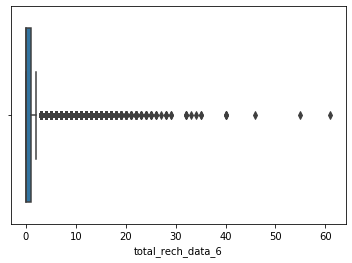

In [170]:
# Checking for outliers total_rech_data_x, av_rech_amt_data_x,total_rech_amt_x
sns.boxplot(tele.total_rech_data_6)
#In the boxplot if we have group of outliers away from group, drop the rows having those outliers
# for ex tele.drop(tele.index[tele.total_rech_amt_x> y], inplace = True)

In [171]:
# Drop the outliers greater than 40
tele.drop(tele.index[tele.total_rech_data_6 >= 40 ], inplace = True)

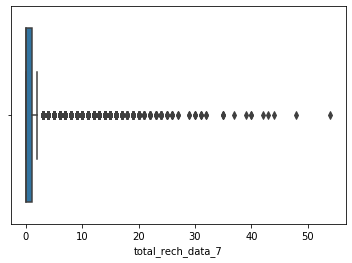

In [172]:
# check for outliers
sns.boxplot(tele.total_rech_data_7)

In [173]:
# drop the outliers
tele.drop(tele.index[tele.total_rech_data_7> 35], inplace = True)

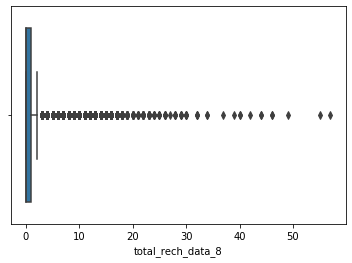

In [174]:
# plot the feature to check for outliers
sns.boxplot(tele.total_rech_data_8)

In [175]:
#drop the outliers
tele.drop(tele.index[tele.total_rech_data_8> 35], inplace = True)

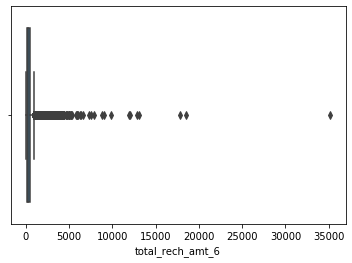

In [176]:
# plot the reacharge amount of 6th column
sns.boxplot(tele.total_rech_amt_6)

In [177]:
# drop the outliers 
tele.drop(tele.index[tele.total_rech_amt_6>25000], inplace = True)

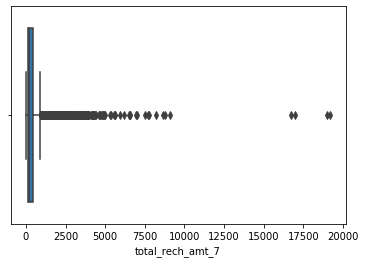

In [178]:
# plot a boxplot to check for outliers
sns.boxplot(tele.total_rech_amt_7)

In [179]:
# drop the outliers
tele.drop(tele.index[tele.total_rech_amt_7>15000], inplace = True)

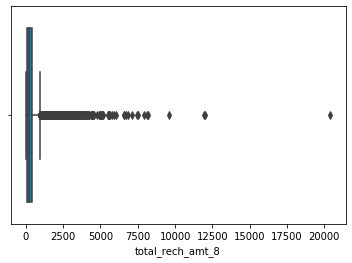

In [180]:
# plot the boxplot
sns.boxplot(tele.total_rech_amt_8)

In [181]:
# drop the outliers
tele.drop(tele.index[tele.total_rech_amt_8> 12500],inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

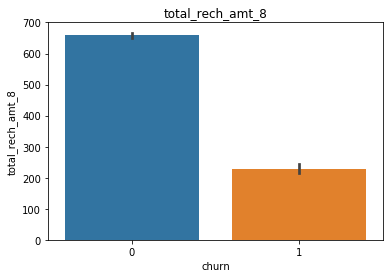

In [182]:
# Let's check the total_rech_amt for 8th month and how it varies with 6 and 7 months
bins = 100
sns.barplot(x='churn',y='total_rech_amt_8',data = tele1)
plt.title('total_rech_amt_8')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

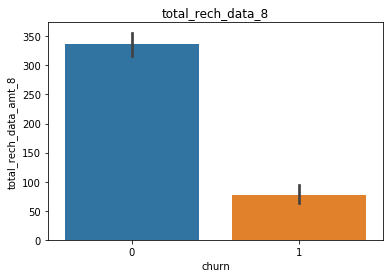

In [183]:
bins = 100
sns.barplot(x='churn',y='total_rech_data_amt_8',data = tele1)
plt.title('total_rech_data_8')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

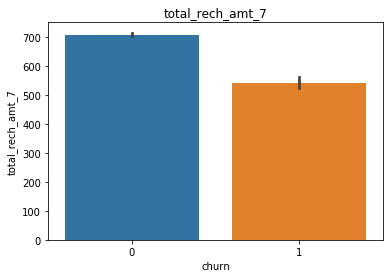

In [184]:
#lets plot total_rech_amt for 7th month
bins = 100
sns.barplot(x='churn',y='total_rech_amt_7',data = tele1)
plt.title('total_rech_amt_7')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

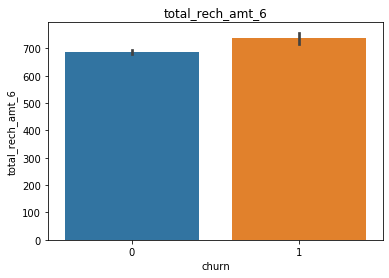

In [185]:
#lets plot the total_rech_amt for 6th month
bins = 100
sns.barplot(x='churn',y='total_rech_amt_6',data = tele1)
plt.title('total_rech_amt_6')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

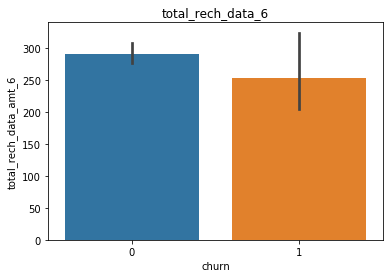

In [186]:
#lets plot the total rech data for 6th month
bins = 100
sns.barplot(x='churn',y='total_rech_data_amt_6',data = tele1)
plt.title('total_rech_data_6')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

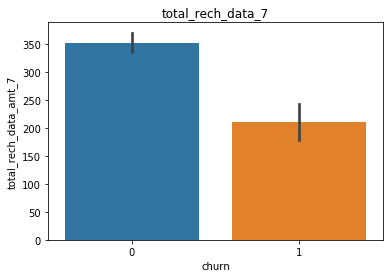

In [187]:
#lets plot the total rech amt for data for 7 month
bins = 100
sns.barplot(x='churn',y='total_rech_data_amt_7',data = tele1)
plt.title('total_rech_data_7')
plt.show

## By Analysing the data, we can find a significant drop in total recharge amount and total recharge data amount in 8th month when compared with 6th and 7th months, which implies those customers are likely to churn and preventive measures have to be taken to stop them from churning.

In [188]:
pd.set_option('display.max_columns', None)
col = tele.columns.tolist()
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [189]:
# we can drop all the feature having -9 at the end, since we have already derived the churn variable
tele1 = tele1.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9',
                    'loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9',
                    'std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9',
                    'std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9',
                    'loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9',
                    'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','av_rech_amt_data_9',
                    'loc_ic_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_data_9',
                    'total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','vol_2g_mb_9','vol_3g_mb_9',
                    'monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','last-rech-date-9'],axis =1)         

In [190]:
tele1.shape

(29637, 156)

In [191]:
#Derive variable: total_roam_mou = roam_ic_mou + roam_og_mou
tele1['total_roam_mou_6'] = tele1['roam_ic_mou_6'] + tele1['roam_og_mou_6']
tele1['total_roam_mou_7'] = tele1['roam_ic_mou_7'] + tele1['roam_og_mou_7']
tele1['total_roam_mou_8'] = tele1['roam_ic_mou_8'] + tele1['roam_og_mou_8']

In [192]:
#Since total_roam_mou_x feature is created, dropping sub features roam_ic_mou_x and roam_og_mou_x
tele1.drop(['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'], axis = 1, inplace = True)
#loc_og_mou_x and std_og_mou_x are critical features which are a summation of sub features which could be dropped
#loc_og_t2t_mou + loc_og_t2m_mou + loc_og_t2f_mou = loc_og_mou
#std_og_t2t_mou + std_og_t2m_mou + std_og_t2f_mou = std_og_mou
#loc_og_mou + std_og_mou + isd_og_mou + spl_og_mou + og_others= total_og_mou
tele1.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
             'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
             'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8'], axis = 1, inplace = True)
#loc_ic_t2t_mou + loc_ic_t2m_mou + loc_ic_t2f_mou = loc_ic_mou
#std_ic_t2t_mou + std_ic_t2m_mou + std_ic_t2f_mou = std_ic_mou
#loc_ic_mou + std_ic_mou + isd_ic_mou + spl_ic_mou + ic_others= total_ic_mou
tele1.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
             'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
             'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','ic_others_6','ic_others_7','ic_others_8'], axis = 1, inplace = True)

In [193]:
#Drop circle_id since circle_id has only 1 value (109), and there is no variance in the data
#Drop loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_x, std_ic_t2o_mou_x since values are restricted to 0 and blank.
tele1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],  axis = 1, inplace = True)

In [194]:
final_ds1 = tele1.copy()
final_ds2 = tele1.copy()

In [195]:
#final_ds1 created with only continuous variables to be normalised
final_ds1.drop(['mobile_number','churn'],  axis = 1, inplace = True)

In [196]:
# Normalising continuous features
normalized_ds1=(final_ds1-final_ds1.mean())/final_ds1.std()
final_ds2.drop(final_ds2.columns.difference(['mobile_number','churn']), 1, inplace=True)
final_ds2 = pd.concat([final_ds2,normalized_ds1],axis=1)
final_ds2.shape

(29637, 89)

In [197]:
#Calculation of churn rate
churn = (sum(final_ds2['churn'])/len(final_ds2['churn'].index))*100
churn

12.2144616526639

### Reduce the number of features using PCA

In [198]:
# splliting the data into train and test set
from sklearn.model_selection import train_test_split
X = final_ds2.drop(['churn','mobile_number'],axis =1)
y = final_ds2['churn']
y.head()

6     0
7     1
8     0
13    0
15    0
Name: churn, dtype: int32

In [199]:
X_train,X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [200]:
# Initially we calculate the PC's using train data and then apply them later on test data
X_train.shape

(20745, 87)

In [70]:
from sklearn.decomposition import PCA
# Unsupervised approach
# We derive number of principal components based on a variance set to 0.90
pca = PCA(0.90)
train_pca = pca.fit_transform(X_train)
train_pca.shape


(20745, 35)

In [71]:
#applying pca on test data
test_pca = pca.transform(X_test)
test_pca.shape

(8892, 35)

### Creating correlation matrix for principal components

In [72]:
corrmat = np.corrcoef(train_pca.transpose())

max corr :  1.0880185501251511e-15 min corr :  -9.187483053831203e-16


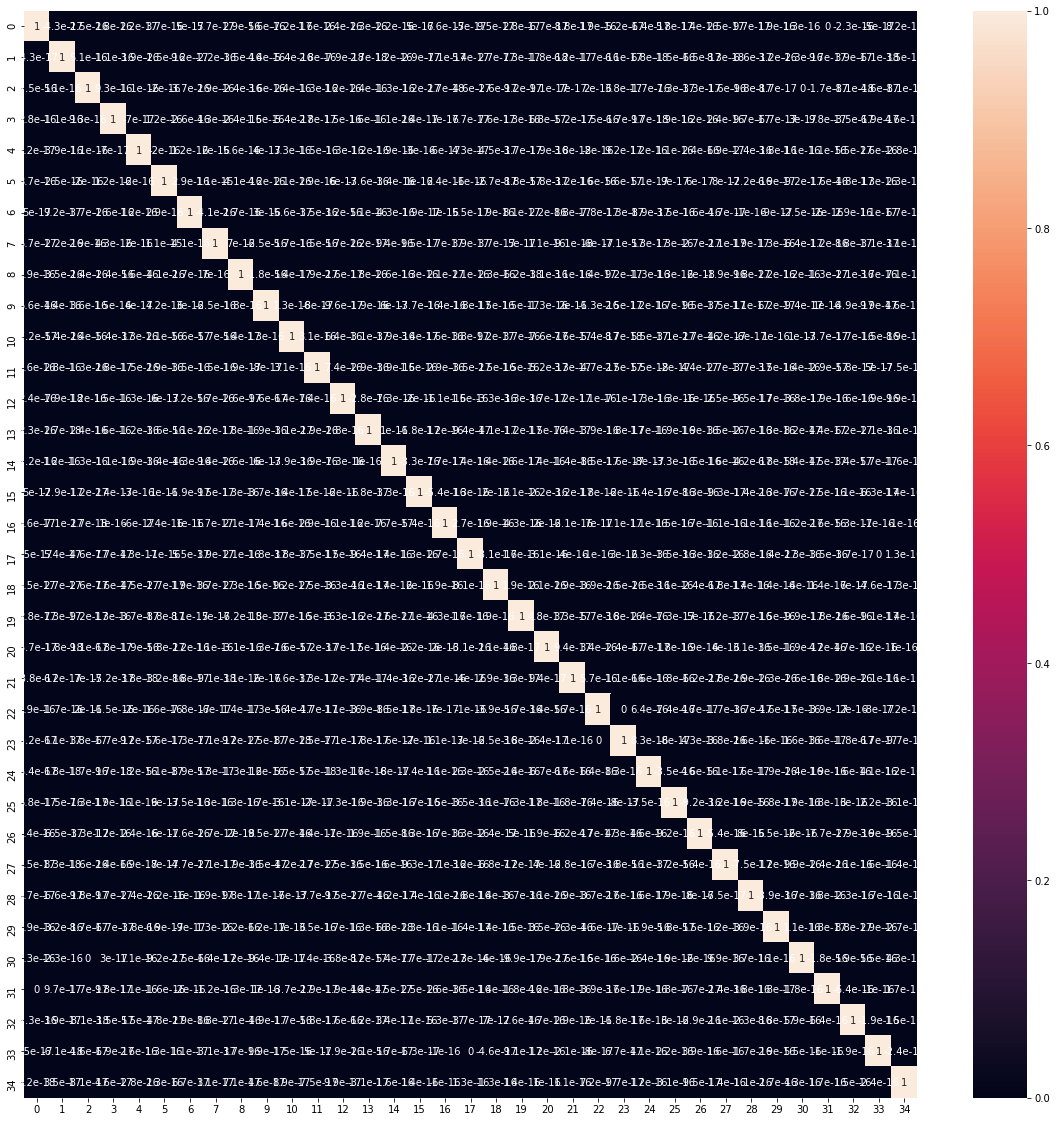

In [73]:
# plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(corrmat, annot = True)
corrmat_nodiag = corrmat-np.diagflat(corrmat.diagonal())
print("max corr : ", corrmat_nodiag.max(), "min corr : ", corrmat_nodiag.min())


### As the data is imbalanced , we need to treat it and convert it to a balanced data

### Treating imbalance data using SMOTE

In [74]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(train_pca, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 2546
Before OverSampling, counts of label '0': 18199 



Using TensorFlow backend.


After OverSampling, the shape of train_X: (36398, 35)
After OverSampling, the shape of train_y: (36398,) 

After OverSampling, counts of label '1': 18199
After OverSampling, counts of label '0': 18199


In [75]:
corrmat = np.corrcoef(X_train_res.transpose())

max corr :  0.22795375937459733 min corr :  -0.16467499551771878


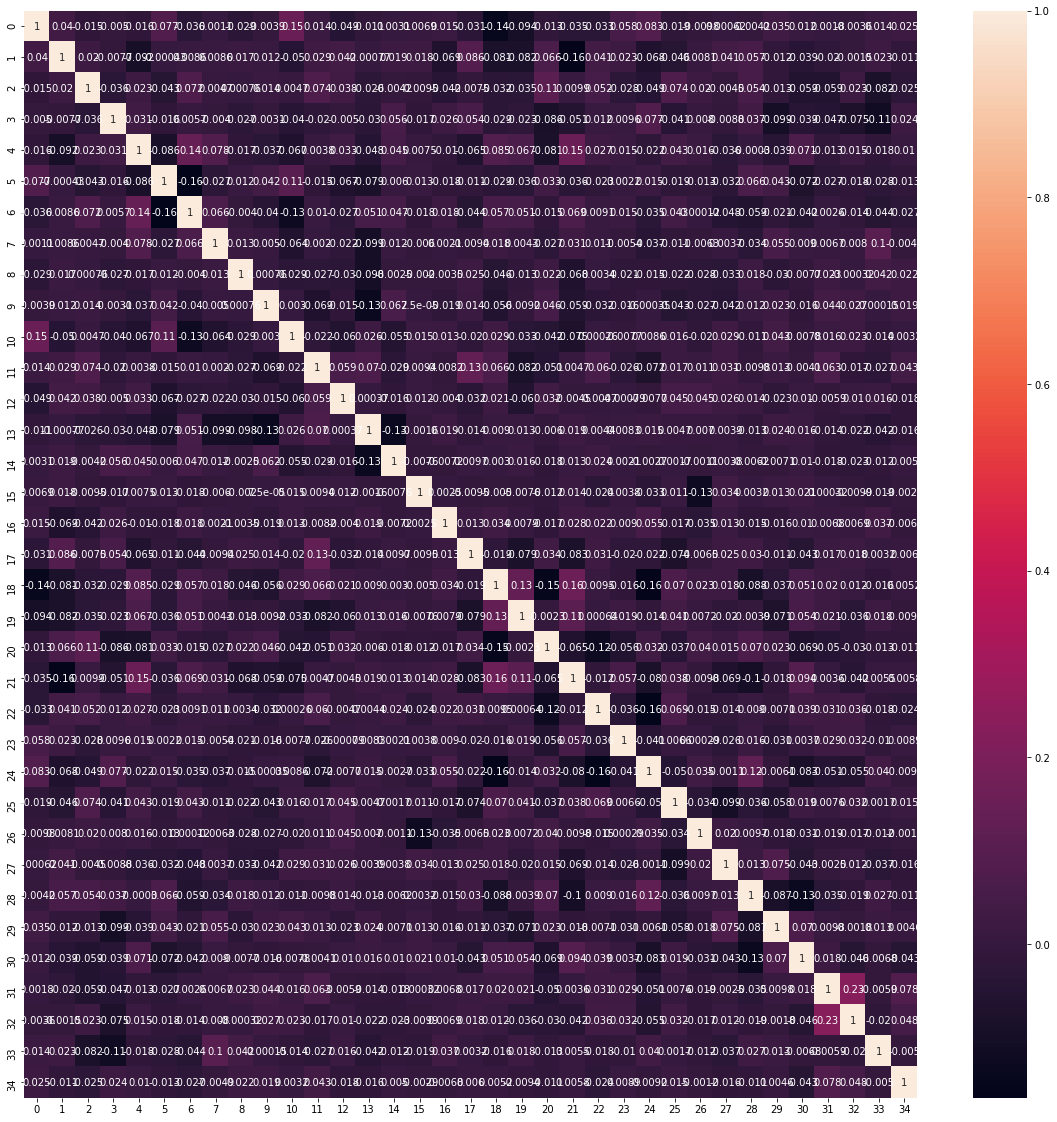

In [76]:
# plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(corrmat, annot = True)
corrmat_nodiag = corrmat-np.diagflat(corrmat.diagonal())
print("max corr : ", corrmat_nodiag.max(), "min corr : ", corrmat_nodiag.min())

### From above we could observe lot of multicolinearity in principal components , but after balancing the data , we can see a clear drop in multicolinearity.

In [77]:
# Training the regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_res,y_train_res)
test_pca = pca.transform(X_test)
test_pca.shape

(8892, 35)

In [78]:
# making predictions on test data
pred_prob_test = model_pca.predict_proba(test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test,pred_prob_test))

'0.89'

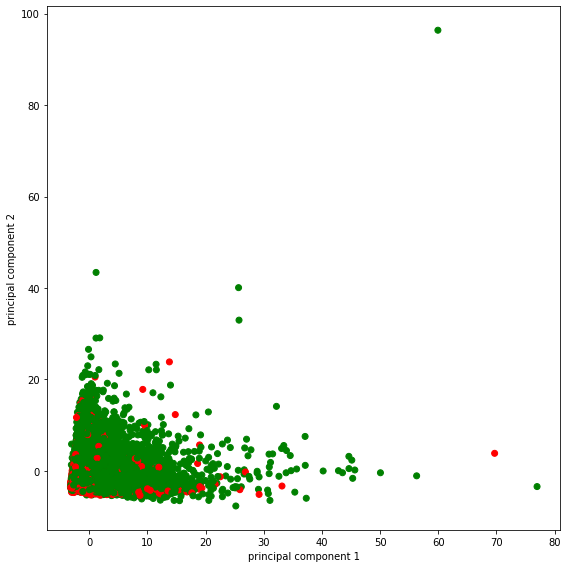

In [79]:
#visualizing the data
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(train_pca[:,0],train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()


In [80]:
#pred_probs_test
y_pred_df = pd.DataFrame(pred_prob_test)
y_pred_df.head()

,0
0,0.006867
1,0.612143
2,0.145304
3,0.049355
4,0.468058


In [81]:
def f(x):
    try:
        return int(float(x))
    except ValueError:
        return x

y_pred_df.rename(columns=f)

,0
0,6.867480e-03
1,6.121431e-01
2,1.453038e-01
3,4.935467e-02
4,4.680583e-01
5,2.642953e-01
6,9.042188e-01
7,1.241039e-03
8,1.545620e-01
9,4.977390e-01


In [82]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
66539,0
36241,0
10501,0
48293,0
97781,0


In [83]:
# Putting mobile_number to index
y_test_df['mobile_number'] = y_test_df.index
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [84]:
y_test_df.head()

,churn,mobile_number
0,0,66539
1,0,36241
2,0,10501
3,0,48293
4,0,97781


In [85]:
y_pred_df.head()

,0
0,0.006867
1,0.612143
2,0.145304
3,0.049355
4,0.468058


In [87]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final[0].map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,churn,mobile_number,0,predicted
0,0,66539,0.006867,0
1,0,36241,0.612143,1
2,0,10501,0.145304,0
3,0,48293,0.049355,0
4,0,97781,0.468058,0


### SVM using PCA

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [89]:
model = SVC(C=1)
model.fit(X_train_res,y_train_res)
SVM_pred = model.predict(test_pca)

In [90]:
#creating kfold object with 5 splits
folds = KFold(n_splits=5,shuffle=True,random_state=4)
hyper_params = [{
                'C':[0.1,1,10,100,1000]}]
model = SVC()
# set up grid search scheme
model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)  

In [92]:
model_cv.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 57.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [93]:
#cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,45.797208,0.561139,6.439111,0.098995,0.1,{'C': 0.1},0.857830,0.860165,0.855220,0.861245,0.855063,0.857904,0.002512,5,0.860499,0.860464,0.861563,0.861705,0.861740,0.861194,0.000585
1,38.907084,0.384176,5.011321,0.011692,1,{'C': 1},0.894231,0.896978,0.891209,0.894903,0.893667,0.894197,0.001868,4,0.903015,0.902775,0.903462,0.903156,0.903499,0.903181,0.000273
2,56.135609,2.537792,3.977469,0.034979,10,{'C': 10},0.921566,0.921703,0.917445,0.917571,0.917159,0.919089,0.002083,3,0.935057,0.934370,0.935229,0.934854,0.935884,0.935079,0.000495
3,124.636058,5.433466,3.211622,0.016555,100,{'C': 100},0.934203,0.935440,0.932418,0.933233,0.929523,0.932963,0.001994,2,0.960231,0.960540,0.960609,0.959477,0.961091,0.960389,0.000533
4,316.851021,6.008359,2.571268,0.023376,1000,{'C': 1000},0.937775,0.941484,0.936813,0.941475,0.938316,0.939173,0.001944,1,0.982348,0.982451,0.982554,0.981043,0.982657,0.982211,0.000593


In [94]:
cv_results['param_C']=cv_results['param_C'].astype('int')

In [95]:
#printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("the best test score is {0} corresponding to hypermeters {1}".format(best_score,best_hyperparams))

the best test score is 0.9391725217357173 corresponding to hypermeters {'C': 1000}


In [96]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, SVM_pred))

# precision
print("precision", metrics.precision_score(y_test, SVM_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, SVM_pred))

accuracy 0.8780926675663517
precision 0.4970896391152503
recall 0.7951582867783985


### Build non linear SVM model to classify churns and compare the performance with the linear SVM model

In [97]:
# using rbf kernel, C=1, default value of gamma
NLmodel = SVC(C = 1, kernel='rbf')
NLmodel.fit(X_train_res, y_train_res)
y_NLpred = NLmodel.predict(test_pca)

In [98]:
#Model evaluation - Confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_NLpred)

array([[6954,  864],
       [ 220,  854]], dtype=int64)

In [99]:
#Hyperparameter tuning, to find optimal gamma and C

# creating a KFold object with 5 splits 
foldsNL = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params_1 = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
NLmodel = SVC(kernel="rbf")

# set up GridSearchCV()
NLmodel_cv = GridSearchCV(estimator = NLmodel, 
                        param_grid = hyper_params_1, 
                        scoring= 'accuracy', 
                        cv = foldsNL, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
NLmodel_cv.fit(X_train_res, y_train_res)   

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 131.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [100]:
# cv results
cv_results2 = pd.DataFrame(NLmodel_cv.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.889680,0.318249,5.055060,0.015927,1,0.01,"{'C': 1, 'gamma': 0.01}",0.885989,0.888049,0.883654,0.886798,0.885836,0.886065,0.001439,5,0.893228,0.892163,0.894292,0.894055,0.893472,0.893442,0.000746
1,42.044499,0.289400,6.006047,0.030564,1,0.001,"{'C': 1, 'gamma': 0.001}",0.845467,0.846429,0.840659,0.850666,0.841187,0.844882,0.003679,10,0.845628,0.845456,0.847448,0.845702,0.847076,0.846262,0.000829
2,51.543681,0.191922,7.532608,0.018211,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.828846,0.831731,0.824313,0.836791,0.825251,0.829386,0.004549,12,0.830380,0.829590,0.830552,0.827982,0.830351,0.829771,0.000954
3,43.945490,0.272867,4.112566,0.020676,10,0.01,"{'C': 10, 'gamma': 0.01}",0.910577,0.914286,0.907830,0.909053,0.909466,0.910242,0.002204,3,0.923209,0.923930,0.925167,0.924448,0.925272,0.924405,0.000773
4,38.914634,0.398214,5.325216,0.025221,10,0.001,"{'C': 10, 'gamma': 0.001}",0.864698,0.868407,0.859890,0.870037,0.863443,0.865295,0.003610,7,0.868535,0.867230,0.869771,0.868265,0.868849,0.868530,0.000825
5,44.346517,0.470684,6.182926,0.058782,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.837500,0.839698,0.832280,0.843110,0.832807,0.837079,0.004116,11,0.838519,0.836905,0.838519,0.837185,0.839692,0.838164,0.001013
6,108.268437,4.314744,3.411690,0.012497,100,0.01,"{'C': 100, 'gamma': 0.01}",0.928159,0.927747,0.922940,0.925264,0.923341,0.925490,0.002163,2,0.948966,0.949069,0.950477,0.950033,0.950719,0.949853,0.000717
7,51.366471,0.273156,4.673908,0.018222,100,0.001,"{'C': 100, 'gamma': 0.001}",0.882555,0.887363,0.878022,0.882951,0.881852,0.882548,0.002977,6,0.889106,0.887698,0.890377,0.890415,0.888698,0.889259,0.001035
8,44.264867,0.484314,5.729909,0.031862,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.848352,0.848352,0.840797,0.850941,0.842011,0.846090,0.003960,9,0.846178,0.846452,0.849062,0.846973,0.847866,0.847306,0.001050
9,455.773266,21.409889,4.095844,0.237623,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.935165,0.939423,0.933654,0.936530,0.930210,0.934996,0.003056,1,0.971736,0.972113,0.973212,0.972595,0.972080,0.972347,0.000512


In [101]:
# printing the optimal accuracy score and hyperparameters
best_score = NLmodel_cv.best_score_
best_hyperparams = NLmodel_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9349963390092528 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [102]:
# specify optimal hyperparameters
best_params2 = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
fin_model = SVC(C=10, gamma=0.01, kernel="rbf")

fin_model.fit(X_train_res, y_train_res)
y_pred_fin = fin_model.predict(test_pca)

# metrics
print(metrics.confusion_matrix(y_test, y_pred_fin), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred_fin))
print("precision", metrics.precision_score(y_test, y_pred_fin))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred_fin))

[[6995  823]
 [ 239  835]] 

accuracy 0.8805668016194332
precision 0.5036188178528347
sensitivity/recall 0.7774674115456238


### Decision Tree using PCA

In [103]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7818
           1       0.31      0.76      0.44      1074

    accuracy                           0.76      8892
   macro avg       0.63      0.76      0.64      8892
weighted avg       0.88      0.76      0.80      8892



In [105]:
# Printing confusion matrix, accuracy, sensitivity
print(metrics.confusion_matrix(y_test,y_pred_default))
print(metrics.accuracy_score(y_test,y_pred_default))
print(metrics.recall_score(y_test, y_pred_default))

[[5981 1837]
 [ 263  811]]
0.7638326585695007
0.75512104283054


In [106]:
#GridSearchCV for calculating optimal hyper parameters
# GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [107]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.925213,0.040397,0.000766,0.001532,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.766209,0.775824,0.762225,0.769474,0.777579,0.770262,0.005764,15
1,1.911557,0.079616,0.007683,0.006982,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.766209,0.775824,0.762225,0.769474,0.777579,0.770262,0.005764,15
2,1.947590,0.112732,0.005314,0.006169,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.766346,0.775549,0.761813,0.769062,0.778541,0.770262,0.006077,13
3,1.919598,0.108019,0.006466,0.004960,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.766346,0.775549,0.761813,0.769062,0.778541,0.770262,0.006077,13
4,3.189154,0.085236,0.005180,0.005786,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.816484,0.822802,0.827335,0.824152,0.825251,0.823205,0.003674,3
5,3.225363,0.133900,0.010080,0.005710,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.816484,0.822802,0.826923,0.824289,0.824839,0.823067,0.003547,4
6,3.392081,0.243986,0.004633,0.006332,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.812912,0.817445,0.813736,0.814398,0.817832,0.815265,0.001998,7
7,3.876407,0.302572,0.001816,0.001858,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.812912,0.817445,0.813736,0.814398,0.817832,0.815265,0.001998,7
8,1.240225,0.202142,0.004379,0.006127,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.771429,0.776236,0.763736,0.773046,0.795988,0.776087,0.010766,9
9,0.911561,0.010684,0.001027,0.002054,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.771429,0.776236,0.763736,0.773046,0.795988,0.776087,0.010766,9


In [108]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8258973729938148
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [109]:
#model with optimal hyperparameters
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [110]:
# accuracy score
clf_gini.score(test_pca,y_test)

0.8148897885739991

In [111]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7818
           1       0.37      0.76      0.50      1074

    accuracy                           0.81      8892
   macro avg       0.67      0.79      0.69      8892
weighted avg       0.89      0.81      0.84      8892



### For our problem we need to find the model with best Sensitivity, since its critical for us to identify churn customers correctly (its acceptable if a small chunk of non churn customers are incorrectly predicted as churn customers; but its not acceptable if we classify churn customers as non churn customers).
### From the above models linear SVM gives us the best sensitivity of 79.5% which helps us in predicting all the churns  perfectly

### As PCA makes the model non interpretable, we need to generate models with out PCA/ feature reduction
### We need to find the critical features which help in predicting the customers who are most likely to churn

# SVM  without pca/ feature reduction

In [201]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [202]:
model = SVC(C=1,kernel = 'rbf')
model.fit(X_train,y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [203]:
#creating kfold object with 5 splits
folds = KFold(n_splits=5,shuffle=True,random_state=4)
hyper_params = [{'gamma':[1e-2,1e-3,1e-4],
                'C':[1,10,100,1000]}]

In [204]:
model = SVC(kernel = 'rbf')

In [205]:
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

In [206]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 39.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [207]:
#cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.256999,0.763335,3.018040,0.274581,1,0.01,"{'C': 1, 'gamma': 0.01}",0.912991,0.907930,0.911545,0.906966,0.900699,0.908026,0.004286,5,0.918655,0.920101,0.921909,0.922933,0.922873,0.921294,0.001670
1,13.979142,0.134697,2.643125,0.022962,1,0.001,"{'C': 1, 'gamma': 0.001}",0.898530,0.895396,0.899976,0.893468,0.892986,0.896071,0.002758,9,0.896180,0.896963,0.896481,0.896180,0.898409,0.896843,0.000834
2,14.041964,0.139934,2.658754,0.020724,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.875633,0.875392,0.884792,0.870812,0.879730,0.877272,0.004702,12,0.877742,0.877742,0.875392,0.878886,0.876717,0.877296,0.001174
3,18.417642,0.307320,2.807186,0.044061,10,0.01,"{'C': 10, 'gamma': 0.01}",0.919258,0.915883,0.916124,0.911545,0.907448,0.914052,0.004115,1,0.948482,0.949566,0.949928,0.951314,0.950711,0.950000,0.000973
4,13.947429,0.207133,2.547872,0.101985,10,0.001,"{'C': 10, 'gamma': 0.001}",0.908894,0.906966,0.913714,0.907207,0.900699,0.907496,0.004176,6,0.910521,0.912148,0.913774,0.912991,0.914678,0.912822,0.001424
5,14.038627,0.220548,2.627513,0.018215,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.896602,0.895155,0.900940,0.892263,0.893227,0.895638,0.003049,10,0.895336,0.896722,0.896421,0.896059,0.898349,0.896577,0.000999
6,27.916838,0.269430,2.636891,0.031858,100,0.01,"{'C': 100, 'gamma': 0.01}",0.904073,0.904073,0.909858,0.905760,0.902386,0.905230,0.002548,8,0.972222,0.970957,0.971559,0.972041,0.973186,0.971993,0.000740
7,17.734829,0.129573,2.302589,0.023377,100,0.001,"{'C': 100, 'gamma': 0.001}",0.915401,0.914196,0.917329,0.907930,0.905037,0.911979,0.004687,2,0.925283,0.926729,0.926850,0.927272,0.928356,0.926898,0.000990
8,14.495319,0.250158,2.544851,0.113114,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.904555,0.903350,0.912509,0.905037,0.901181,0.905327,0.003830,7,0.905399,0.907086,0.907387,0.908713,0.910822,0.907881,0.001810
9,78.165520,9.949099,3.185018,0.361427,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.891781,0.891781,0.894191,0.890335,0.888648,0.891347,0.001832,11,0.988431,0.987828,0.987768,0.988672,0.988973,0.988335,0.000471


In [208]:
cv_results['param_C']=cv_results['param_C'].astype('int')

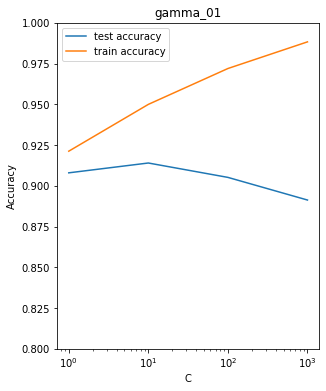

In [209]:
#plotting
plt.figure(figsize=(16,6))
#subplot1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("gamma_01")
plt.ylim([0.80,1])
plt.legend(['test accuracy','train accuracy'],loc= 'upper left')
plt.xscale('log')
plt.show()

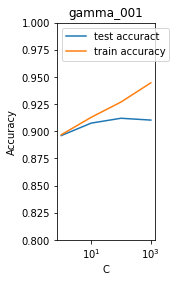

In [210]:
#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']== 0.001]
plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("gamma_001")
plt.ylim([0.80,1])
plt.legend(['test accuract','train accuracy'],loc = 'upper left')
plt.xscale('log')
plt.show()

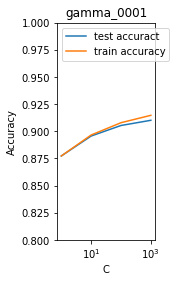

In [211]:
#subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']== 0.0001]
plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("gamma_0001")
plt.ylim([0.80,1])
plt.legend(['test accuract','train accuracy'],loc = 'upper left')
plt.xscale('log')

In [212]:
#printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("the best test score is {0} corresponding to hypermeters {1}".format(best_score,best_hyperparams))

the best test score is 0.914051578693661 corresponding to hypermeters {'C': 10, 'gamma': 0.01}


In [213]:
#Building and Evaluating Final model
#specify optimal hyperparameters
best_params={'C': 10,"gamma":0.01,'kernel' : 'rbf'}

In [214]:
#model
model = SVC(C=1000,gamma = 0.01,kernel = 'rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [215]:
#metrics
print(metrics.confusion_matrix(y_test,y_pred),"\n")

[[7328  490]
 [ 483  591]] 



In [216]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.8905757984705354


In [217]:
print("precission",metrics.precision_score(y_test,y_pred))

precission 0.5467160037002775


In [218]:
print("recall",metrics.recall_score(y_test,y_pred))

recall 0.5502793296089385


In [219]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7818
           1       0.55      0.55      0.55      1074

    accuracy                           0.89      8892
   macro avg       0.74      0.74      0.74      8892
weighted avg       0.89      0.89      0.89      8892



### Nonlinear SVM gives us a sensitivity/ recall of 55% for predicting the churn

# Random Forest

In [130]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [131]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
# Making predictions
predictions = rfc.predict(X_test)

In [133]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [134]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7818
           1       0.79      0.55      0.65      1074

    accuracy                           0.93      8892
   macro avg       0.87      0.77      0.80      8892
weighted avg       0.92      0.93      0.92      8892



In [135]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7662  156]
 [ 482  592]]


In [136]:
print(accuracy_score(y_test,predictions))

0.9282501124606388


# Grid Search to Find Optimal Hyperparameters

In [137]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [138]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [139]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.920703784044348 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


### Fitting the final model with the best parameters obtained from grid search.

In [140]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [141]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
# predict
predictions = rfc.predict(X_test)

In [143]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7818
           1       0.78      0.51      0.62      1074

    accuracy                           0.92      8892
   macro avg       0.86      0.75      0.79      8892
weighted avg       0.92      0.92      0.92      8892



In [145]:
print(confusion_matrix(y_test,predictions))

[[7665  153]
 [ 525  549]]


In [146]:
features = list(X_train.columns)
fi_model = pd.DataFrame({'feature': features,
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [147]:
fi_model

,feature,importance
29,total_ic_mou_8,1.912570e-01
20,total_og_mou_8,1.533750e-01
2,arpu_8,1.086064e-01
35,total_rech_amt_8,9.444959e-02
38,max_rech_amt_8,6.051296e-02
14,loc_og_mou_8,4.585601e-02
41,last_day_rch_amt_8,4.446296e-02
23,loc_ic_mou_8,3.578816e-02
8,offnet_mou_8,3.523236e-02
26,std_ic_mou_8,2.166506e-02


### 1.)Random forest based model (without PCA) helps achieve sensitivity of 0.51, accuracy score of 0.92
### 2) Comparing both SVM and Random Forests models built without PCA, SVM is giving us better sensitivity compared to Random forest.
### 3) The features that influence the customer behaviour are drawn according to their importance.
### 4) Top 10 features influencing customer churn -  total_ic_mou_8, total_og_mou_8,  arpu_8,total_rech_amt_8,max_rech_amt_8,loc_og_mou_8,last_day_rch_amt_8,loc_ic_mou_8,offnet_mou_8,std_ic_mou_8.
### 5) From the features , we can draw an important insight that all the top features are from month 8, this implies the action phase features i.e, total incoming/outgoing minutes of usage, arpu, recharge amount variables, std/local incoming minutes of usage etc during 8th month in action phase are the most critical features to be focussed on, to avoid the customers from churning.
### 6) Now that we have key indicators for potential churn customers ahead of time, appropriate marketing techniques could be adopted, to retain these high value customers in future.